In this notebook I will define all the functions which will be used in the project and in the other notebook I will show the methodology with states of Punjab and Kerala as examples.

In [1]:
#Importing a few important libraries essential to the work.
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Now I will upload all the csv files I will be using into dataframes

potential_yield = pd.read_csv("./dataset/potentialyield.csv")
harvested_area = pd.read_csv("./dataset/harvest_data_actual.csv") #The year is integer type
production_values= pd.read_csv("./dataset/productionvalues_actualyield.csv")
exclusion_areas= pd.read_csv("./dataset/Exclusionareas.csv")
tree_cover_share= pd.read_csv("./dataset/Treecover_share_GAEZ.csv")
aez_classification = pd.read_csv("./dataset/Classificationzones57.csv")


# The production_values defined here will be sued for calculating crop residue from the year 2000 and 2010 under different
# conditions. The harvested area will be used for future residue from cropland calculations and the potential yield will be
# used for future residue from cropland as well as biomass potential from future marginal land.

# Biomass Potential from Agricultural Residues for Actual Yield (2000 and 2010)


 To be able to calculate the Biomass potential we will need the crop Residue-to-Product Ratio, Surplus Availability Factor/
 Availability Factor and Lower Heating Value. The following table summarizes these values for the crops we have from the 
 actual yields and production data:

| Crop         | Residue Type  | RPR   | SAF   | LHV (MJ/kg) | Sources         |
|--------------|---------------|-------|-------|-------------|-----------------|
| Maize        | Stalk         | 2     | 0.8   | 16.3        | a, b, j         |
|              | Cob           | 0.273 | 1     | 16.63       |                 |
|              | Husk          | 0.2   | 1     | 15.56       |                 |
| Rice         | Straw         | 1.757 | 0.684 | 8.83        | b, d, e         |
|              | Husk          | 0.23  | 0.83  | 12.9        | c, e, f         |
| Sorghum      | Straw         | 1.25  | 0.8   | 12.38       | a, b            |
|              | Husk          | 1.4   | 1     | 13          | c, j            |
| Millet       | Straw         | 1.4   | 1     | 13          | c, j            |
|              | Stalk         | 1.75  | 0.8   | 15.51       | a, b, f         |
| Wheat        | Straw         | 1.2   | 0.29  | 15.6        | b, j            |
|              | Husk          | 0.23  | 0.29  | 12.9        | b, f            |
| Cassava      | Stalk         | 0.062 | 0.407 | 16.99       | a, d, e         |
|              | Peelings      | 3     | 0.2   | 10.61       | a, i            |
| Cocoyam      | Peelings      | 0.2   | 0.8   | 10.61       | i, j            |
| Sweet potato | Peelings      | 0.6   | 0.8   | 10.61       | b, j            |
| Yam          | Peelings      | 0.2   | 0.8   | 10.61       | i, j            |
| Potatoes     | Peelings      | 0.75  | 0.8   | 10.61       | i, j            |
| Groundnuts   | Shells/husks  | 0.477 | 1     | 15.56       | a, i, c         |
|              | Straw         | 2.3   | 1     | 17.58       | a               |
| Palm oil     | Fiber         | 0.147 | 1     | 19.94       | a, i            |
|              | Shells        | 0.049 | 1     | 21.1        | a, i            |
|              | Fronds        | 2.604 | 1     | 7.97        | i               |
|              | Empty bunches | 0.428 | 1     | 19.41       | a, i            |
|              | Male bunches  | 0.233 | 1     | 14.86       | i, j            |
| Beans(In Pulses)| Straw      | 2.5   | 1     | 12.38       | j               |
| Soybean      | Straw         | 2.66  | 0.8   | 18          | b, f            |
|              | Pods          | 1     | 0.8   | 18          | a, b, f         |
| Banana       | leaves        | 0.35  | 1     | 11.37       | g               |
|              | stem          | 5.6   | 1     | 11.66       | a, j            |
|              | peels         | 0.25  | 1     | 17          | h, j            |
| Plantain(With Bananas)| leaves| 0.35 | 0.8   | 12.12       | g, i            |
|              | stem          | 3.91  | 0.8   | 10.9        | g, i            |
|              | peels         | 0.25  | 1     | 12.56       | a, h            |
| Sugar Cane   | baggase       | 0.25  | 1     | 6.43        | b, c            |
|              | tops/leaves   | 0.32  | 0.8   | 15.8        | b, c            |
| Coffee       | husk          | 1     | 1     | 12.8        | b, c            |
| Cocoa        | pods/husks    | 1     | 1     | 15.48       | j               |
| Cotton       | stalk         | 2.1   | 1     | 15.9        | c, i            |
| Barley       | straw         | 0.75  | 0.15  | 17.5        | k               |
|              | stalk         | 1.60  | 0.60  | 18.5        | k               |
| Tobacco      | stalk         | 1.20  | 0.60  | 16.1        | k               |
| Sunflower    | stalk         | 2.50  | 0.60  | 14.2        | k               |
| Sugarbeet    | residue       | 0.66  | 0.09  | 20.85       | p,q             |
| Rapeseed     | straw         | 1.58  | 0.23  | 14.55       | l               |    
| Olives       | cake          | 0.40  | 0.90  | 19.7        | k               |
| Lettuce      | waste         |1.2    | 0.50  | 12.8        | l               |
| Tomatoes     | stem          |0.3    | 0.50  | 13.7        | l               |
| Tomatoes     | leaves        |0.3    | 0.50  | 13.7        | l               |
| Green peppers| residues      |0.45   | 0.50  | 12.0        | l               |
| Red Peppers  | residues      |0.45   | 0.50  | 12.0        | l               |
| Other Cereals| straw         | 1.2   | 0.40  | 16.845      | n,o             |
| Rest of Crops| residue       | 0     | 0     | 0           | Not found       |
| Fodder Crops | straw         | 0.4   | 0     | 0           | p               |   
| Tur          | stalk         | 2.5   | 0.38  |18.58        | m               |
| Lentils      | stalk         | 1.8   | 0.38  |14.65        | m               |
| Gaur         | stalk         | 1.0   | 0.38  |16.02        | m               |
| Gram         | stalk         | 1.1   | 0.38  |16.02        | m               |
| Fruits and Nuts|pruning      | 0     | 0     |0            | Not found       |

So for calculating the biomass potential of residues we have the production values data from GAEZ v4 for the years 2000 and 2010 which we will be using. The data in these rasters gives us the production of the particular crop in 1000 tonnes or 1 mln GK\\$. The other unit present in the data is mln GK\\$ which is used by FAO for crop groups like Fodder Crops, Pulses, Vegetables etc.

The documentation of the GAEZ v4 describes the yield as either tonnes/hectare or 1000 GK\\$/hectare. From this, we derive that 1 million GK\\$ = 1000 tonnes.

The following group contains the following crops according the GAEZ v4 Documentation:
- Fodder Crops: All commodities in FAOSTAT primary crop production domain ranging from forage and silage, maize to vegetables and roots fodders.
- Pulses: Bambara beans; beans, dry; broad beans, dry; chick peas; cow peas, dry;lentils; peas, dry; pigeon peas; pulses, other
- Other cereals: Buckwheat; canary seed; fonio; mixed grain; oats; pop corn; quinoa; rye; triticale;
- Yams and other roots: Taro; yautia; yams; roots and tubers;
- Other crops: Includes all other crops from FAOSTAT production domain not covered by 25 crop groups above and excluding coir, vegetable tallow, oil of stillinga, oil of citronella, essential oils and rubber, natural.


Assumptions made on the basis of GAEZ V4 documentation, from which we are using actual yield data:
- Stimulants in the GAEZ v4 includes Cocoa Beans, Coffee, Green Tea, Tea. We have till now considered only Cocoa and Coffee.
- In Yams and other roots, till now we have only included Yams and CocoYams(Taro)
- In Vegetables we have taken Green and Red Peppers (Residues), Tomatoes (Stem and Leaves) and Lettuce (Waste) (We will take their mean value for RPR, SAF, and LHV since individual weightage in the crop yield is not available.)
- In Pulses, we have taken Tur, Gaur, Gram, Beans and Lentils.(We will use their average based on same reason as above).
- In Other Cereals, we have taken oats and rye.(We will use their average based on same reason as above).



# References:
RPR and LHV values given were obtained from already published studies conducted in other countries, such as Ghana, Uganda, Zambia and China.

A source for most of these references was: https://www.aimspress.com/article/doi/10.3934/energy.2023002?viewType=HTML.
The references are as follows:
- a. Jekayinfa SO, Scholz V (2009) Potential availability of energetically usable crop residues in Nigeria. Energy Sources, Part A: Recovery, Util, Environ Effects 31: 687–697. https://doi.org/10.1080/15567030701750549 doi: 10.1080/15567030701750549.
- b. Gabisa EW, Gheewala SH (2018) Potential of bio-energy production in Ethiopia based on available biomass residues. Biomass Bioenergy 111: 77–87. https://doi.org/10.1016/j.biombioe.2018.02.009 doi: 10.1016/j.biombioe.2018.02.009.
- c. Okello C, Pindozzi S, Faugno S, et al. (2013) Bioenergy potential of agricultural and forest residues in Uganda. Biomass Bioenergy 56: 515–525. https://doi.org/10.1016/j.biombioe.2013.06.003 doi: 10.1016/j.biombioe.2013.06.003.
- d. Koopmans A, Koppenjan J (1998) The Resource Base. Reg Consult Mod Appl Biomass Energy, 6–10.
- e. San V, Ly D, Check NI (2013) Assessment of sustainable energy potential on non-plantation biomass resources in Sameakki Meanchey district in Kampong Chhnan pronice, Cambonia. Int J Environ Rural Dev 4: 173–178.
- f. Yang J, Wang X, Ma H, et al. (2014) Potential usage, vertical value chain and challenge of biomass resource: Evidence from China's crop residues. Appl Energy 114: 717–723. https://doi.org/10.1016/j.apenergy.2013.10.019 doi: 10.1016/j.apenergy.2013.10.019.
- g. Patiño FGB, Araque JA, Kafarov DV (2016) Assessment of the energy potential of agricultural residues in non-interconnected zones of Colombia: Case study of Chocó and Putumayo katherine Rodríguez cáceres. Chem Eng Trans 50: 349–354. https://doi.org/10.3303/CET1650059 doi: 10.3303/CET1650059.
- h. Milbrandt A (2011) Assessment of biomass resources in Liberia. Liberia: Dev Resour, 117–166.
- i.Kemausuor F, Kamp A, Thomsen ST, et al. (2014) Assessment of biomass residue availability and bioenergy yields in Ghana. Resou Conser Recycl 86: 28–37. https://doi.org/10.1016/j.resconrec.2014.01.007 doi: 10.1016/j.resconrec.2014.01.007.
- j. Mboumboue E, Njomo D (2018) Biomass resources assessment and bioenergy generation for a clean and sustainable development in Cameroon. Biomass Bioenergy 118: 16–23. https://doi.org/10.1016/j.biombioe.2018.08.002 doi: 10.1016/j.biombioe.2018.08.002.
- k. https://www.researchgate.net/publication/342000532_Agricultural_Residues_Potential_of_Hatay.
- l. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9941997/.
- m. https://www.saarcenergy.org/wp-content/uploads/2020/03/Final-Draft-SEC-report-on-crop-residue_14022020-1540-IM-1.pdf.
- n. https://www.sciencedirect.com/science/article/pii/S0956053X10002436?via%3Dihub.
- o. https://www.sciencedirect.com/science/article/pii/S0921344920305280.
- p. https://www.diva-portal.org/smash/get/diva2:1208954/FULLTEXT01.pdf.
- q.https://www.researchgate.net/publication/317490809_VALORIZATION_OF_SUGAR_BEET_PULP_RESIDUE_AS_A_SOLID_FUEL_VIA_TORREFACTION

Now the final table sorted on the crop names which will be converted into a pandas dataframe for us to use will contain: 
- All the vegetables combined into Vegegtables row.
- Coffee & Cocoa combined under stimulants row.
- All the pulses as mentioned above will be grouped under pulses row.

<h2><center>Final Crop Table with RPR, SAF and LHV values</center></h2>

| Crop         | Residue Type  | RPR   | SAF   | LHV (MJ/kg) |
|--------------|---------------|-------|-------|-------------|
| Banana       | leaves        | 0.35  | 0.9   | 11.745      |
| Banana       | peels         | 0.25  | 1     | 14.78       |
| Banana       | stem          | 4.90  | 0.9   | 11.66       |
| Barley       | stalk         | 1.60  | 0.60  | 18.5        |
| Barley       | straw         | 0.75  | 0.15  | 17.5        |
| Cassava      | Peelings      | 3     | 0.2   | 10.61       |
| Cassava      | Stalk         | 0.062 | 0.407 | 16.99       |
| Cotton       | stalk         | 2.1   | 1     | 15.9        |
| Fodder Crops | straw         | 0.4   | 0     | 0           |
|Fruits and nuts| pruning      | 0     | 0     | 0           |
| Groundnut    | Shells/husks  | 0.477 | 1     | 15.56       |
| Groundnut    | Straw         | 2.3   | 1     | 17.58       |
| Maize        | Cob           | 0.273 | 1     | 16.63       |
| Maize        | Husk          | 0.2   | 1     | 15.56       |
| Maize        | Stalk         | 2     | 0.8   | 16.3        |
| Millet       | Stalk         | 1.75  | 0.8   | 15.51       |
| Millet       | Straw         | 1.4   | 1     | 13          |
| Other Cereals| straw         | 1.2   | 0.40  | 16.845      |
| Oil palm     | Empty bunches | 0.428 | 1     | 19.41       |
| Oil palm     | Fiber         | 0.147 | 1     | 19.94       |
| Oil palm     | Fronds        | 2.604 | 1     | 7.97        |
| Oil palm     | Male bunches  | 0.233 | 1     | 14.86       |
| Oil palm     | Shells        | 0.049 | 1     | 21.1        |
| Olive        | Cake          | 0.40  | 0.9   | 19.7        |
| Potato and Sweet Potato | Peelings | 0.675 |0.8  |10.61|
| Pulses       | stalk         | 1.78  | 0.504 |15.53        |
| Rapeseed     | straw         | 1.58  | 0.23  | 14.55       |
| Wetland rice | Husk          | 0.23  | 0.83  | 12.9        |
| Wetland rice | Straw         | 1.757 | 0.684 | 8.83        |
| Sorghum      | Husk          | 1.4   | 1     | 13          |
| Sorghum      | Straw         | 1.25  | 0.8   | 12.38       |
| Soybean      | Pods          | 1     | 0.8   | 18          |
| Soybean      | Straw         | 2.66  | 0.8   | 18          |
| Stimulants   | husks         | 1     | 1     | 14.14       |
| Sugar Cane   | baggase       | 0.25  | 1     | 6.43        |
| Sugar Cane   | tops/leaves   | 0.32  | 0.8   | 15.8        |
| Sugarbeet    | residue       | 0.66  | 0.09  | 20.85       |
| Sunflower    | stalk         | 2.50  | 0.60  | 14.2        |
| Tobacco      | stalk         | 1.20  | 0.60  | 16.1        |
| Vegetables   | residue       | 0.675 | 0.50  | 12.625      |
| Wheat        | Husk          | 0.23  | 0.29  | 12.9        |
| Wheat        | Straw         | 1.2   | 0.29  | 15.6        |
| Yam and others| Peelings     | 0.2   | 0.8   | 10.61       |
| Rest of crops| Resdiue       | 0.0   | 0.0   | 0           |
|


In [3]:
#Now importing the table in pandas format so that we can use it for geospatial analysis
#Defining the table data
data = [
    ['Banana', 'leaves', 0.35, 0.9, 11.745],
    ['Banana', 'peels', 0.25, 1, 14.78],
    ['Banana', 'stem', 4.90, 0.9, 11.66],
    ['Barley', 'stalk', 1.60, 0.60, 18.5],
    ['Barley', 'straw', 0.75, 0.15, 17.5],
    ['Cassava', 'Peelings', 3, 0.2, 10.61],
    ['Cassava', 'Stalk', 0.062, 0.407, 16.99],
    ['Cotton', 'stalk', 2.1, 1, 15.9],
    ['Fodder crops', 'straw', 0.4, 0, 0],
    ['Fruits and nuts', 'Pruning' , 0, 0, 0],
    ['Groundnut', 'Shells/husks', 0.477, 1, 15.56],
    ['Groundnut', 'Straw', 2.3, 1, 17.58],
    ['Maize', 'Cob', 0.273, 1, 16.63],
    ['Maize', 'Husk', 0.2, 1, 15.56],
    ['Maize', 'Stalk', 2, 0.8, 16.3],
    ['Millet', 'Stalk', 1.75, 0.8, 15.51],
    ['Millet', 'Straw', 1.4, 1, 13],
    ['Other cereals', 'straw', 1.2, 0.40, 16.845],
    ['Oil palm', 'Empty bunches', 0.428, 1, 19.41],
    ['Oil palm', 'Fiber', 0.147, 1, 19.94],
    ['Oil palm', 'Fronds', 2.604, 1, 7.97],
    ['Oil palm', 'Male bunches', 0.233, 1, 14.86],
    ['Oil palm', 'Shells', 0.049, 1, 21.1],
    ['Olive' , 'Cake', 0.4, 0.9, 19.7],
    ['Potato and Sweet Potato', 'Peelings', 0.675, 0.8, 10.61],
    ['Pulses', 'stalk', 1.78, 0.504, 15.53],
    ['Rapeseed', 'straw', 1.58, 0.23, 14.55],
    ['Wetland rice', 'Husk', 0.23, 0.83, 12.9],
    ['Wetland rice', 'Straw', 1.757, 0.684, 8.83],
    ['Sorghum', 'Husk', 1.4, 1, 13],
    ['Sorghum', 'Straw', 1.25, 0.8, 12.38],
    ['Soybean', 'Pods', 1, 0.8, 18],
    ['Soybean', 'Straw', 2.66, 0.8, 18],
    ['Stimulants', 'husks', 1, 1, 14.14],
    ['Sugarcane', 'baggase', 0.25, 1, 6.43],
    ['Sugarcane', 'tops/leaves', 0.32, 0.8, 15.8],
    ['Sugarbeet', 'residue', 0.66, 0.09, 20.85],
    ['Sunflower', 'stalk', 2.50, 0.60, 14.2],
    ['Tobacco', 'stalk', 1.20, 0.60, 16.1],
    ['Vegetables', 'residue', 0.675, 0.50, 12.625],
    ['Wheat', 'Husk', 0.23, 0.29, 12.9],
    ['Wheat', 'Straw', 1.2, 0.29, 15.6],
    ['Yams and other roots', 'Peelings', 0.2, 0.8, 10.61],
    ['Rest of crops', 'Residue' , 0, 0, 0]
]

# Defining the column names
columns = ['Crop', 'Residue Type', 'RPR', 'SAF', 'LHV (MJ/kg)']

# Create the DataFrame
residue_values = pd.DataFrame(data, columns=columns)

In [4]:
# Now that we have all the required data, I will create two functions which takes in the relevant input in terms of time
# period and irrigation. One of the function will loop through all the crops and the other will simply provide crop as an 
# input option so that we can also view for a particular crop.

#Importing necessary libraries
import rasterio
from rasterio.mask import mask
from rasterio.plot import show
from rasterio.crs import CRS

def get_actual_data_biomass_potential_crop(shapefile, time_period, water_supply, crop):
    
    final_potential =0 
    
    #Filtering out the dataframe based on the input 
    filtered_production_values= production_values[(production_values['Time Period']== time_period)&
                                                 (production_values['Crop']== crop) &
                                                 (production_values['Water Supply']== water_supply)]
    required_production_values = filtered_production_values['Download URL']
    #Getting the url based on the filtered input
    required_url = required_production_values.values[0].strip()
    #Opening the raster
    with rasterio.open(required_url) as src:
        crs_crop= src.crs #Storing the raster crs for potential use
        
        #Clipping the raster based on the shapefile provided
        clipped_shapefile, clipped_transform = mask(src, shapefile.geometry, crop=True)
        #Adding up the values within the shapefile
        sum_value_shapefile = np.nansum(clipped_shapefile)
        
        # Retrieving residues for the specific crop from residue_values DataFrame
        residue_rows = residue_values.loc[residue_values['Crop'] == crop]

        # Running a loop over rows containing the same crop but different residues.
        for _, residue_row in residue_rows.iterrows():
            LHV = residue_row['LHV (MJ/kg)']
            SAF = residue_row['SAF']
            RPR = residue_row['RPR']

            # Multiplying the sum of pixel values with LHV, SAF, and RPR values for the respective crop
            result_shapefile = sum_value_shapefile * LHV * SAF * RPR
            
             # Accumulating and storing the results
            final_potential += result_shapefile
    # The last thing to do is unit conversion
    # The Energy Output was in MJ/Kg. The yield values were in 1000 tonnes which is 10^6 kg. The MJ when converted to Joule 
    # is also a factor a 10^6. So to get the value in Joule we will multiply by 10^12.
    
    print (f" The biomass potential for the {crop} in the selected region is {final_potential*(10**12)} Joules")
    return final_potential*(10**12)

In [5]:
unique_crops_actual = production_values['Crop'].unique()

def get_actual_data_biomass_potential_all(shapefile, time_period, water_supply):
    final_potential = 0
    
    filtered_production_values = production_values[(production_values['Time Period'] == time_period) &
                                                   (production_values['Water Supply'] == water_supply)]
    required_production_values = filtered_production_values[['Crop','Download URL']]
    
    for crop in unique_crops_actual:
        required_url = required_production_values[required_production_values['Crop']==crop]['Download URL'].values[0].strip()
        
        with rasterio.open(required_url) as src:
            crs_crop = src.crs
            clipped_shapefile, clipped_transform = mask(src, shapefile.geometry, crop=True)
            sum_value_shapefile = np.nansum(clipped_shapefile)
            
        residue_rows = residue_values.loc[residue_values['Crop'] == crop]
            
        for _, residue_row in residue_rows.iterrows():
            LHV = residue_row['LHV (MJ/kg)']
            SAF = residue_row['SAF']
            RPR = residue_row['RPR']
    
            result_shapefile = sum_value_shapefile * LHV * SAF * RPR
            final_potential += result_shapefile
    
    final_potential_joules = final_potential * (10 ** 12)
    print(f"The biomass potential for all the crops in the selected region is {final_potential_joules} Joules")
    return final_potential_joules


So above I have created two functions as per our requirment and this finishes the biomass potential from agricultural
residue from the years 2000 and 2010.

# Biomass Potential from Agricultural Residues for Future Years.

Now since the cropland data with what crops will be grown within the cropland is not available to us we will be making an assumption. The assumption is that in the future the cropland which is required for us for food security remains the same as is was in the year 2010. So the crop data that we had from actual yields and production will serve as the cropland for all future calculations. But since, with time the yield will vary and so will the residue from each crop. Assuming that RPR, SAF and LHV values also remain same for the crops in the future we will get the harvested area from the 2010 data for any shapefile and then multiply it with the future yield to get the future production. This will further be multiplied by RPR, SAF and LHV giving us residues in the future. These residue values can then be compared and will give us an idea as to how different conditions affect the residue from the cropland. 

I would also like to mention this does not include the marginal land and calculations for that will be done separately after removing the cropland as well. Also as of now the function only includes the crops whose future potential yield data exists.

In [6]:
#Function doing as described above
import pandas as pd
import rasterio
from rasterio.mask import mask
import numpy

#Finding out the common crops for which I can find the future yields.

merged_df = pd.merge(harvested_area, potential_yield, on='Crop', how='inner')
unique_crops = merged_df['Crop'].unique()

def future_residues_all(time_period, climate_model, rcp, water_supply_future, input_level, shapefile_path, water_supply_2010):
    filtered_harvested_area = harvested_area[(harvested_area['Time Period'] == 2010) &
                                             (harvested_area['Water Supply'] == water_supply_2010)]
    required_harvested_area = filtered_harvested_area[['Crop', 'Download URL']]

    filtered_potential_yield = potential_yield[(potential_yield['Time Period'] == time_period) &
                                               (potential_yield['Climate Model'] == climate_model) &
                                               (potential_yield['RCP'] == rcp) &
                                               (potential_yield['Water Supply'] == water_supply_future) &
                                               (potential_yield['Input Level'] == input_level)]
    required_potential_yields = filtered_potential_yield[['Crop', 'Download URL']]

    net_sum = 0  # Variable to store the net sum of sum products

    for crop in unique_crops:
        harvested_raster_url = required_harvested_area[required_harvested_area['Crop'] == crop]['Download URL'].values[0].strip()
        potential_yield_raster_url = required_potential_yields[required_potential_yields['Crop'] == crop]['Download URL'].values[0].strip()

        with rasterio.open(harvested_raster_url) as src:
            clipped, _ = mask(src, shapefile_path.geometry, crop=True)

        with rasterio.open(potential_yield_raster_url.strip()) as src:
            clipped_2, _ = mask(src, shapefile_path.geometry, crop=True)
        
        clipped_1 = np.nan_to_num(clipped)
        clipped_3 = np.nan_to_num(clipped_2)

        product = numpy.multiply(clipped, clipped_2)
        sum_product = numpy.nansum(product)

        # Extract RPR, SAF, and LHV values for the crop
        residue_rows = residue_values[residue_values['Crop'] == crop]
        temp_sum = 0
    
        for _, residue_row in residue_rows.iterrows():    
            LHV = residue_row['LHV (MJ/kg)']
            SAF = residue_row['SAF']
            RPR = residue_row['RPR']

    # Multiply the sum_product with RPR, SAF, and LHV
            result = sum_product * RPR * SAF * LHV
            temp_sum += result
    
        net_sum += temp_sum


    return (net_sum)*(10**9)


In [7]:
# We also wanted to create a function that does this for a single crop as well.
import pandas as pd
import rasterio
from rasterio.mask import mask
import numpy

def future_residues_crop(crop, time_period, climate_model, rcp, water_supply_future, input_level, shapefile_path, water_supply_2010):
    filtered_harvested_area = harvested_area[(harvested_area['Time Period'] == 2010) &
                                             (harvested_area['Water Supply'] == water_supply_2010)]
    required_harvested_area = filtered_harvested_area[['Crop', 'Download URL']]

    filtered_potential_yield = potential_yield[(potential_yield['Time Period'] == time_period) &
                                               (potential_yield['Climate Model'] == climate_model) &
                                               (potential_yield['RCP'] == rcp) &
                                               (potential_yield['Water Supply'] == water_supply_future) &
                                               (potential_yield['Input Level'] == input_level)]
    required_potential_yields = filtered_potential_yield[['Crop', 'Download URL']]

    net_sum = 0  # Variable to store the net sum of sum products

    harvested_raster_url = required_harvested_area[required_harvested_area['Crop'] == crop]['Download URL'].values[0].strip()
    potential_yield_raster_url = required_potential_yields[required_potential_yields['Crop'] == crop]['Download URL'].values[0].strip()

    with rasterio.open(harvested_raster_url) as src:
        clipped, _ = mask(src, shapefile_path.geometry, crop=True)

    with rasterio.open(potential_yield_raster_url.strip()) as src:
        clipped_2, _ = mask(src, shapefile_path.geometry, crop=True)
    
    clipped_1 = np.nan_to_num(clipped)
    clipped_3 = np.nan_to_num(clipped_2)

    product = numpy.multiply(clipped, clipped_2)
    sum_product = numpy.nansum(product)

    # Extract RPR, SAF, and LHV values for the crop
    residue_rows = residue_values[residue_values['Crop'] == crop]
    
    temp_sum = 0
    
    for _, residue_row in residue_rows.iterrows():    
        LHV = residue_row['LHV (MJ/kg)']
        SAF = residue_row['SAF']
        RPR = residue_row['RPR']

    # Multiply the sum_product with RPR, SAF, and LHV
        result = sum_product * RPR * SAF * LHV
        temp_sum += result
    
    net_sum += temp_sum


    return (net_sum)*(10**9) # 1000 ha to ha and MJ to Joules


So this completes all cropland residue calculations for us. Next we will move to residue and biomass potential from the marginal land but before we get into this we will have to generate the marginal land. So we need to extract certain pixels from certain rasters which will be masked later to accound for deserts, water, glaciers etc.

# Biomass Potential from Potential Yield on Marginal Lands

Before moving on to describe the functions, we need to store the RPR, SAF and LHV values for the crops available in the potential yield theme in GAEZ. Since this table will be required soon, I will be forming it now so that I can use it later.

<h2><center>Final Potential Yield Crop Table with RPR, SAF and LHV values</center></h2>

| Crop                  | Residue Type    | RPR   | SAF   | LHV (MJ/kg) |
|:----------------------:|:-----------------:|:-------:|:-------:|:-------------:|
| Alfalfa               | residue         | 0.25  | 0.0   | 0.0         |
| Banana                | leaves          | 0.35  | 0.9   | 11.745      |
| Banana                | peels           | 0.25  | 1     | 14.78       |
| Banana                | stem            | 4.90  | 0.9   | 11.66       |
| Barley                | stalk           | 1.60  | 0.60  | 18.5        |
| Barley                | straw           | 0.75  | 0.15  | 17.5        |
| Biomass highland sorghum |Husk            | 1.4   | 1     | 13          |
| Biomass highland sorghum | Straw           | 1.25  | 0.8   | 12.38       |
| Biomass lowland sorghum  |Husk            | 1.4   | 1     | 13          |
|Biomass lowland sorghum  | Straw           | 1.25  | 0.8   | 12.38       |
| Biomass sorghum       |Husk            | 1.4   | 1     | 13          |
|Biomass sorghum        | Straw           | 1.25  | 0.8   | 12.38       |
| Biomass temperate sorghum | Husk            | 1.4   | 1     | 13          |
| Biomass temperate sorghum | Straw           | 1.25  | 0.8   | 12.38       |
| Buckwheat             | straw         | 1.2   | 0.40  | 16.845      |
| Cabbage               | residue       | 0.675 | 0.50  | 12.625      |
| Carrot                | residue       | 0.675 | 0.50  | 12.625      |
| Cassava               | Peelings        | 3     | 0.2   | 10.61       |
| Cassava               | Stalk           | 0.062 | 0.407 | 16.99       |
| Chickpea              | stalk         | 1.78  | 0.504 |15.53        |
| Citrus                | pruning        | 0.29     | 0.8   | 17.85       |
| Cocoa                 |  pods/husks    | 1     | 1     | 15.48       |
| Cocoa cumoun          |  pods/husks    | 1     | 1     | 15.48       |
| Cocoa hybrid          |  pods/husks    | 1     | 1     | 15.48       |
| Coconut               | Husk           | 1.03  | 1     | 18.6        |
| Coconut               | Coir dust      | 0.62  | 1     | 13.4        |
| Cocoyam               |  Peelings      | 0.2   | 0.8   | 10.61       |
| Coffee                | husk          | 1     | 1     | 12.8         |
| Coffee arabica        |husk          | 1     | 1     | 12.8          |
| Coffee robusta        |husk          | 1     | 1     | 12.8          |
| Cotton                | stalk           | 2.1   | 1     | 15.9       |
| Cowpea                | stalk         | 1.78  | 0.504 |15.53         |
| Dry pea               |stalk         | 1.78  | 0.504 |15.53          |
| Dryland rice          | Husk            | 0.23  | 0.83  | 12.9       |
| Dryland rice          | Straw           | 1.757 | 0.684 | 8.83       |
| Flax                  |  stalk           | 2.50  | 0.60  | 14.2      |
| Foxtail millet        |  Stalk           | 1.75  | 0.8   | 15.51     |
| Foxtail millet                | Straw           | 1.4   | 1     | 13 |
| Gram                  |stalk         | 1.1   | 0.38  |16.02          |
| Grass                 |  straw         | 0.4   | 0     | 0           |
| Greater yam           |Peelings      | 0.2   | 0.8   | 10.61         |
| Groundnut             | Shells/husks    | 0.477 | 1     | 15.56      |
| Groundnut             | Straw           | 2.3   | 1     | 17.58      |
| Highland maize        | Cob             | 0.273 | 1     | 16.63      |
| Highland maize                 | Husk            | 0.2   | 1     | 15.56|
| Highland maize                 | Stalk           | 2     | 0.8   | 16.3 |
| Highland sorghum      | Husk            | 1.4   | 1     | 13         |
|Highland sorghum       | Straw           | 1.25  | 0.8   | 12.38      |
| Jatropha | Woody Biomass | 0.25 | 0.8 | 15.5 |
| Jatropha | Leaves | 0.25 | 0.8 | 12 |
| Jatropha | Pericarp | 0.20 | 0.8 | 10 |
| Jatropha | Tegument | 0 | 10.8 | 16.9 |
| Jatropha | Endosperm Cake | 0.2 | 0.8 | 13.6 |
| Lowland maize         | Cob             | 0.273 | 1     | 16.63       |
| Lowland maize                 | Husk            | 0.2   | 1     | 15.56       |
| Lowland maize                 | Stalk           | 2     | 0.8   | 16.3        |
| Lowland sorghum       |Husk            | 1.4   | 1     | 13          |
|Lowland sorghum        | Straw           | 1.25  | 0.8   | 12.38       |
| Maize                 | Cob             | 0.273 | 1     | 16.63       |
| Maize                 | Husk            | 0.2   | 1     | 15.56       |
| Maize                 | Stalk           | 2     | 0.8   | 16.3        |
| Millet                | Stalk           | 1.75  | 0.8   | 15.51       |
| Millet                | Straw           | 1.4   | 1     | 13          |
| Miscanthus            | residue        | 0.42   | 1     | 17.44       |
| Napier grass          |  straw         | 0.4   | 0     | 0            |
| Oat                   | straw  |    1.15 |  0.40 | 18.45|
| Oil palm              | Empty bunches   | 0.428 | 1     | 19.41       |
| Oil palm              | Fiber           | 0.147 | 1     | 19.94       |
| Oil palm              | Fronds          | 2.604 | 1     | 7.97        |
| Oil palm              | Male bunches    | 0.233 | 1     | 14.86       |
| Oil palm              | Shells          | 0.049 | 1     | 21.1        |
| Olive                 | cake          | 0.40  | 0.90  | 19.7        |
| Onion                 | residue       | 0.675 | 0.50  | 12.625      |
| Para rubber           | residue               | 0     | 0     | 0           |
| Pasture legumes       | stalk         | 1.78  | 0.504 |15.53        |
| Pearl millet          |  Stalk           | 1.75  | 0.8   | 15.51       |
| Pearl millet                | Straw           | 1.4   | 1     | 13          |
| Phaseolus bean        |stalk         | 1.78  | 0.504 |15.53        |
| Pigeonpea             |stalk         | 1.78  | 0.504 |15.53        |
| Rapeseed              | straw           | 1.58  | 0.23  | 14.55       |
| Reed canary grass     |  straw         | 0.4   | 0     | 0           |
| Rye                   |   straw| 1.25|   0.40  | 15.24|
| Silage maize          | Cob             | 0.273 | 1     | 16.63       |
| Silage maize                 | Husk            | 0.2   | 1     | 15.56       |
| Silage maize                 | Stalk           | 2     | 0.8   | 16.3        |
| Sorghum               | Husk            | 1.4   | 1     | 13          |
| Sorghum               | Straw           | 1.25  | 0.8   | 12.38       |
| Soybean               | Pods            | 1     | 0.8   | 18          |
| Soybean               | Straw           | 2.66  | 0.8   | 18          |
| Spring barley         | stalk           | 1.60  | 0.60  | 18.5        |
| Spring barley                | straw           | 0.75  | 0.15  | 17.5        |
| Spring rye            |  straw| 1.25|   0.40  | 15.24|
| Spring wheat          |  Husk            | 0.23  | 0.29  | 12.9        |
| Spring wheat                 | Straw           | 1.2   | 0.29  | 15.6        |
| Sugarbeet             | residue         | 0.66  | 0.09  | 0           |
| Sugar Cane   | baggase       | 0.25  | 1     | 6.43        |
| Sugar Cane   | tops/leaves   | 0.32  | 0.8   | 15.8        |
| Sunflower             | stalk           | 2.50  | 0.60  | 14.2        |
| Sweet potato          |  Peelings      | 0.6   | 0.8   | 10.61       |
| Switchgrass           | straw         | 0.4   | 0     | 0           |
| Tea                   | husks         | 1     | 1     | 14.14       |
| Temperate maize       | Cob             | 0.273 | 1     | 16.63       |
| Temperate maize                 | Husk            | 0.2   | 1     | 15.56       |
| Temperate maize                 | Stalk           | 2     | 0.8   | 16.3        |
| Temperate sorghum     |Husk            | 1.4   | 1     | 13          |
| Temperate sorghum     | Straw           | 1.25  | 0.8   | 12.38       |
| Tobacco               | stalk           | 1.20  | 0.60  | 16.1        |
| Tomato                | stem          |0.3    | 0.50  | 13.7        | l               |
| Tomato                | leaves        |0.3    | 0.50  | 13.7        | l               |
| Wetland rice          | Husk            | 0.23  | 0.83  | 12.9        |
| Wetland rice          | Straw           | 1.757 | 0.684 | 8.83        |
| Wheat                 | Husk            | 0.23  | 0.29  | 12.9        |
| Wheat                 | Straw           | 1.2   | 0.29  | 15.6        |
| White potato          | Peelings      | 0.75  | 0.8   | 10.61       |
| White yam             | Peelings      | 0.2   | 0.8   | 10.61       |
| Winter barley         |  stalk           | 1.60  | 0.60  | 18.5        |
| Winter barley                | straw           | 0.75  | 0.15  | 17.5        |
| Winter rye            |   straw| 1.25|   0.40  | 15.24|
| Winter wheat          |  Husk            | 0.23  | 0.29  | 12.9        |
| Winter wheat                 | Straw           | 1.2   | 0.29  | 15.6        |
| Yam                   |Peelings      | 0.2   | 0.8   | 10.61       |
| Yellow yam            | Peelings      | 0.2   | 0.8   | 10.61       |


Since some extra crops have been added to this table in comparison to the previous table here are the references and few assumptions that have been made in order to make this table complete:

For a few of the crops I have assigned them value based on the following assumptions:

- Biomass highland sorghum, Biomass lowland sorghum, Biomass temperate sorghum, Highland sorghum, Lowland sorghum, Temperate sorghum will all be assigned just the sorghum value.
- Buckwheat will take the value of other cereals
- Onion, Cabbage, Carrot will take the value for vegetables
- Cocoa, Cocoa cumoun, Cocoa hybrid will take the value of Cocoa.
- Coffee, Coffee arabica, Coffee robusta will take the value of Coffee.
- Dryland Rice will take the value of Rice/Wetland Rice.
- Pearl millet, Foxtail millet, Millet will take the value of Millet.
- Greater yam, White yam, Yam, Yellow yam will all be assigned the value of Yam.
- Highland maize, Lowland maize, Silage maize, Temperate maize and Maize will be assigned the value of Maize.
- Spring barley, Winter barley will take the value of Barley 
- Spring rye, Winter rye will take the value of rye
- Spring wheat, Winter wheat will take the value of wheat
- White potato will take the value of Potato
- Tea will take the value of stimulants.
- ChickPea, Cowpea, Dry Pea, Pasture Legumes, Phaseolus bean, Pigeonpea will take the value of pulses.
- Alfalfa, Grass, Napier grass, Para, Rubber, Reed canary grass will take the value of fodder crops.(Alfalfa takes green fodder values which will have different RPR(0.25) but SAF will be 0.)
- Flax, being similar to sunflower, takes the values of sunflower since they belong to similar crop category.
- Citrus here includes the average of Oranges and Lemons

For the crops not included above and in the previous table here are the references:

- Coconut : Reference: https://www.aimspress.com/article/doi/10.3934/energy.2023002?viewType=HTML
- Citrus :  Reference:https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9941997/
- Jatropha : Reference : doi: 10.1016/j.rser.2015.10.009.
- Miscanthus RPR/SAF & LHV: https://www.sciencedirect.com/science/article/pii/S1161030101001022. & https://www.researchgate.net/publication/338950136_Calorific_values_of_Miscanthus_x_giganteus_biomass_cultivated_under_suboptimal_conditions_in_marginal_soils            
- Para Rubber : None

In [8]:
#The final crop data being added to a pandas dataframe:

data = [
    ['Alfalfa', 'residue', 0.25, 0.0, 0.0],
    ['Banana', 'leaves', 0.35, 0.9, 11.745],
    ['Banana', 'peels', 0.25, 1, 14.78],
    ['Banana', 'stem', 4.90, 0.9, 11.66],
    ['Barley', 'stalk', 1.60, 0.60, 18.5],
    ['Barley', 'straw', 0.75, 0.15, 17.5],
    ['Biomass highland sorghum', 'Husk', 1.4, 1, 13],
    ['Biomass highland sorghum', 'Straw', 1.25, 0.8, 12.38],
    ['Biomass lowland sorghum', 'Husk', 1.4, 1, 13],
    ['Biomass lowland sorghum', 'Straw', 1.25, 0.8, 12.38],
    ['Biomass sorghum', 'Husk', 1.4, 1, 13],
    ['Biomass sorghum', 'Straw', 1.25, 0.8, 12.38],
    ['Biomass temperate sorghum', 'Husk', 1.4, 1, 13],
    ['Biomass temperate sorghum', 'Straw', 1.25, 0.8, 12.38],
    ['Buckwheat', 'straw', 1.2, 0.40, 16.845],
    ['Cabbage', 'residue', 0.675, 0.50, 12.625],
    ['Carrot', 'residue', 0.675, 0.50, 12.625],
    ['Cassava', 'Peelings', 3, 0.2, 10.61],
    ['Cassava', 'Stalk', 0.062, 0.407, 16.99],
    ['Chickpea', 'stalk', 1.78, 0.504, 15.53],
    ['Citrus', 'prunings', 0.29 , 0.80 , 17.85],
    ['Cocoa', 'pods/husks', 1, 1, 15.48],
    ['Cocoa cumoun', 'pods/husks', 1, 1, 15.48],
    ['Cocoa hybrid', 'pods/husks', 1, 1, 15.48],
    ['Coconut', 'husk', 1.03, 1, 18.6],
    ['Coconut','coir dust', 0.62, 1, 13.4],
    ['Cocoyam', 'Peelings', 0.2, 0.8, 10.61],
    ['Coffee', 'husk', 1, 1, 12.8],
    ['Coffee arabica', 'husk', 1, 1, 12.8],
    ['Coffee robusta', 'husk', 1, 1, 12.8],
    ['Cotton', 'stalk', 2.1, 1, 15.9],
    ['Cowpea', 'stalk', 1.78, 0.504, 15.53],
    ['Dry pea', 'stalk', 1.78, 0.504, 15.53],
    ['Dryland rice', 'Husk', 0.23, 0.83, 12.9],
    ['Dryland rice', 'Straw', 1.757, 0.684, 8.83],
    ['Flax', 'stalk', 2.5, 0.6, 14.2],
    ['Foxtail millet', 'Stalk', 1.75, 0.8, 15.51],
    ['Foxtail millet', 'Straw', 1.4, 1, 13],
    ['Gram', 'stalk', 1.1, 0.38, 16.02],
    ['Grass', 'straw', 0.4, 0, 0],
    ['Greater yam', 'Peelings', 0.2, 0.8, 10.61],
    ['Groundnut', 'Shells/husks', 0.477, 1, 15.56],
    ['Groundnut', 'Straw', 2.3, 1, 17.58],
    ['Highland maize', 'Cob', 0.273, 1, 16.63],
    ['Highland maize', 'Husk', 0.2, 1, 15.56],
    ['Highland maize', 'Stalk', 2, 0.8, 16.3],
    ['Highland sorghum', 'Husk', 1.4, 1, 13],
    ['Highland sorghum', 'Straw', 1.25, 0.8, 12.38],
    ['Jatropha', 'Woody Biomass', 0.25, 0.8, 15.5],
    ['Jatropha', 'Leaves', 0.25, 0.8, 12],
    ['Jatropha', 'Pericarp', 0.20, 0.8, 10],
    ['Jatropha', 'Tegument', 0, 10.8, 16.9],
    ['Jatropha', 'Endosperm Cake', 0.2, 0.8, 13.6],
    ['Lowland maize', 'Cob', 0.273, 1, 16.63],
    ['Lowland maize', 'Husk', 0.2, 1, 15.56],
    ['Lowland maize', 'Stalk', 2, 0.8, 16.3],
    ['Lowland sorghum', 'Husk', 1.4, 1, 13],
    ['Lowland sorghum', 'Straw', 1.25, 0.8, 12.38],
    ['Maize', 'Cob', 0.273, 1, 16.63],
    ['Maize', 'Husk', 0.2, 1, 15.56],
    ['Maize', 'Stalk', 2, 0.8, 16.3],
    ['Millet', 'Stalk', 1.75, 0.8, 15.51],
    ['Millet', 'Straw', 1.4, 1, 13],
    ['Miscanthus', 'residue', 0.42, 1, 17.44],
    ['Napier grass', 'straw', 0.4, 0, 0],
    ['Oat', 'straw', 1.15, 0.4, 18.45],
    ['Oil palm', 'Empty bunches', 0.428, 1, 19.41],
    ['Oil palm', 'Fiber', 0.147, 1, 19.94],
    ['Oil palm', 'Fronds', 2.604, 1, 7.97],
    ['Oil palm', 'Male bunches', 0.233, 1, 14.86],
    ['Oil palm', 'Shells', 0.049, 1, 21.1],
    ['Olive', 'cake', 0.4, 0.9, 19.7],
    ['Onion', 'residue', 0.675, 0.5, 12.625],
    ['Para rubber', 'residue', 0, 0, 0],
    ['Pasture legumes', 'stalk', 0, 0, 0],
    ['Pearl millet', 'Stalk', 1.75, 0.8, 15.51],
    ['Pearl millet', 'Straw', 1.4, 1, 13],
    ['Phaseolus bean', 'stalk', 1.78, 0.504, 15.53],
    ['Pigeonpea', 'stalk', 1.78, 0.504, 15.53],
    ['Rapeseed', 'straw', 1.58, 0.23, 14.55],
    ['Reed canary grass', 'straw', 0.4, 0, 0],
    ['Rye', 'straw', 1.25, 0.4, 15.24],
    ['Silage maize', 'Cob', 0.273, 1, 16.63],
    ['Silage maize', 'Husk', 0.2, 1, 15.56],
    ['Silage maize', 'Stalk', 2, 0.8, 16.3],
    ['Sorghum', 'Husk', 1.4, 1, 13],
    ['Sorghum', 'Straw', 1.25, 0.8, 12.38],
    ['Soybean', 'Pods', 1, 0.8, 18],
    ['Soybean', 'Straw', 2.66, 0.8, 18],
    ['Spring barley', 'stalk', 1.6, 0.6, 18.5],
    ['Spring barley', 'straw', 0.75, 0.15, 17.5],
    ['Spring rye', 'straw', 1.25, 0.4, 15.24],
    ['Spring wheat', 'Husk', 0.23, 0.29, 12.9],
    ['Spring wheat', 'Straw', 1.2, 0.29, 15.6],
    ['Sugarbeet', 'residue', 0.66, 0.09, 0],
    ['Sugar Cane', 'baggase', 0.25, 1, 6.43],
    ['Sugar Cane', 'tops/leaves', 0.32, 0.8, 15.8],
    ['Sunflower', 'stalk', 2.5, 0.6, 14.2],
    ['Sweet potato', 'Peelings', 0.6, 0.8, 10.61],
    ['Switchgrass', 'straw', 0.4, 0, 0],
    ['Tea', 'husks', 1, 1, 14.14],
    ['Temperate maize', 'Cob', 0.273, 1, 16.63],
    ['Temperate maize', 'Husk', 0.2, 1, 15.56],
    ['Temperate maize', 'Stalk', 2, 0.8, 16.3],
    ['Temperate sorghum', 'Husk', 1.4, 1, 13],
    ['Temperate sorghum', 'Straw', 1.25, 0.8, 12.38],
    ['Tobacco', 'stalk', 1.2, 0.6, 16.1],
    ['Tomato', 'stem', 0.3, 0.5, 13.7],
    ['Tomato', 'leaves', 0.3, 0.5, 13.7],
    ['Wetland rice', 'Husk', 0.23, 0.83, 12.9],
    ['Wetland rice', 'Straw', 1.757, 0.684, 8.83],
    ['Wheat', 'Husk', 0.23, 0.29, 12.9],
    ['Wheat', 'Straw', 1.2, 0.29, 15.6],
    ['White potato', 'Peelings', 0.75, 0.8, 10.61],
    ['White yam', 'Peelings', 0.2, 0.8, 10.61],
    ['Winter barley', 'stalk', 1.6, 0.6, 18.5],
    ['Winter barley', 'straw', 0.75, 0.15, 17.5],
    ['Winter rye', 'straw', 1.25, 0.4, 15.24],
    ['Winter wheat', 'Husk', 0.23, 0.29, 12.9],
    ['Winter wheat', 'Straw', 1.2, 0.29, 15.6],
    ['Yam', 'Peelings', 0.2, 0.8, 10.61],
    ['Yellow yam', 'Peelings', 0.2, 0.8, 10.61]
]

# Defining the column names
columns = ['Crop', 'Residue Type', 'RPR', 'SAF', 'LHV (MJ/kg)']

# Create the DataFrame
all_residue_values = pd.DataFrame(data, columns=columns)

So in order to extract these various pixels we will first load the raster, then we will clip it according to the selected
shapefile. The clipping will result in a numpy array and not a clipped raster. The code for this step is as follows:

In [9]:
def maskingwithshapefile(shapefile, raster_path):
    with rasterio.open(raster_path) as src:
        crs= src.crs
        shapefile.crs=crs
        # Clipping the raster using the input shapefile.
        clipped, transform = mask(src, shapefile.geometry, crop=True )
    return clipped

In [10]:
# Once we have this we will need to convert this array to raster in order to extract the pixels. There will be two seperate
# functions: One incase we need to convert something clipped into a raster and the other incase we need to do it for the 
# whole world map. They will be shown next.

# FOR CLIPPED
# The clipped one has extra parameters which ensure that the clipped raster has the correct latitudes and longitudes acc. to 
# the chosen CRS. This will be mostly usefule when we will try to extract the rasters with the correct longitude and latitude
# values.
import rasterio
from rasterio.transform import from_origin
from rasterio.transform import Affine

# Create a function to convert a NumPy array to an in-memory raster
def array_to_inmemory_raster_for_clipped(array, transform, crs, shapefile):
    
    if len(array.shape) == 2:
        array = array.reshape((1, array.shape[0], array.shape[1]))  # Add a singleton dimension

    _, height, width = array.shape  # Extract the height and width from the shape

    # Reshape the array to 2 dimensions
    array = array[0]  # Extract the first dimension to remove the extra dimension
    
    #Correcting the transform for correct axes value representation
    
    shapefile.geometry.iloc[0]
    xmin= shapefile.bounds.iloc[0,3]
    ymax=shapefile.bounds.iloc[0,0]
    topleft_corner=(xmin,ymax)


    a=transform.a
    b=transform.b
    d=transform.d
    e=transform.e

    transform=Affine(a, b, ymax, d, e, xmin)
# Update the transform with corrected values
    transform = Affine(transform.a, transform.b, ymax, transform.d, transform.e, xmin)
    
    # Define the raster metadata
    meta = {
        'count': 1,
        'dtype': array.dtype,
        'width': width,
        'height': height,
        'crs': crs,
        'transform': transform
    }

    # Create an in-memory raster file
    memory_file = rasterio.MemoryFile()
    with memory_file.open(driver='GTiff', **meta) as dst:
        dst.write(array, 1)

    return memory_file

In [11]:
# FOR NON-CLIPPED:
# This function might not be as used like the above one and will mostly be used only when converting the full rasters from 
# one resolution to the other along with resampling of data

#Create a function to convert a NumPy array to an in-memory raster for non-clipped (this won't include shapefile parameter)
def array_to_inmemory_raster_for_non_clipped(array, transform, crs):
    height, width = array.shape  # Extract the height and width from the shape

    # Define the raster metadata
    meta = {
        'count': 1,
        'dtype': array.dtype,
        'width': width,
        'height': height,
        'crs': crs,
        'transform': transform
    }

    # Create an in-memory raster file
    memory_file = rasterio.MemoryFile()
    with memory_file.open(driver='GTiff', **meta) as dst:
        dst.write(array, 1)

    return memory_file

In [12]:
#Once we have the rasters we are pretty much ready to extract specific pixels from it. The following functions will help us
#do exactly that. One of them will extract pixels with specific values and the other will extract pixels having value above
#a certain threshold.

#### MIGHT MAKE THEM MORE EFFICIENT IF NEEDED
import numpy as np
import pandas as pd
import rasterio
from rasterio import transform

def coordinates_and_values(raster_path, pixel_values):
    with rasterio.open(raster_path) as src:
        df = pd.DataFrame()  # create DataFrame
        raster_band = src.read(1)  # read raster band
        transform_coordinate_conversion = src.transform

        for i in pixel_values:
            rows, cols = np.where(raster_band == i)  # extract row and column numbers for each pixel
            coords = transform_coordinate_conversion * (cols, rows)
            lon, lat = coords[0], coords[1]  # swap lon and lat based on your variable names

            values = np.array([i] * len(rows))  # create array containing n pixel value of n coordinates
            df_i = pd.DataFrame({'lon': lon, 'lat': lat, 'pixel': values, 'row': rows, 'col': cols})  # include 'row' and 'col' columns
            df = pd.concat([df, df_i], ignore_index=True)  # append to get DataFrame of lon, lat, row, col, and pixel

    return df

def coordinates_and_threshold(raster_path, threshold):
    with rasterio.open(raster_path) as src:
        df = pd.DataFrame()  # create DataFrame
        raster_band = src.read(1)  # read raster band
        transform_coordinate_conversion = src.transform

        rows, cols = np.where(raster_band > threshold)  # find row and column indices for pixel values above threshold
        coords = transform_coordinate_conversion * (cols, rows)
        lon, lat = coords[0], coords[1]  # swap lon and lat based on your variable names

        values = raster_band[rows, cols]  # extract pixel values above threshold
        df = pd.DataFrame({'lon': lon, 'lat': lat, 'row': rows, 'col': cols, 'pixel': values})  # include 'row' and 'col' columns

    return df


In [13]:
def clipper(shapefile, raster_path):
    with rasterio.open(raster_path) as src:
        transform_store = src.transform
        crs_store = src.crs
        
    masked = maskingwithshapefile(shapefile , raster_path)
    
    return array_to_inmemory_raster_for_clipped(masked, transform_store, crs_store, shapefile)

In [14]:
#Since both the above functions give us dataframes but we will need geodataframes containing the geometry column with the 
#POINT values for each pixel.

#Again here it is being done for the whole raster to show the implementation but below next I will show it for the clipped
#raster which is what we will be doing in all cases

import geopandas as gpd
from shapely.geometry import Point


def convert_df_to_gdf(dataframe):
    # Convert the DataFrame of coordinates to a GeoDataFrame
    geometry = [Point(lon, lat) for lon, lat in zip(dataframe['lon'], dataframe['lat'])]
    coordinates_gdf = gpd.GeoDataFrame(dataframe, geometry=geometry)
    return coordinates_gdf

In [15]:
#Also since the crop data is in a lower resolution than the AEZ classsification and other data so we will also create a fn.
#for the conversion of Resolution from a higher to lower resolution along with resampling of the pixel values. The current 
#method of resampling used is MODE method.

from rasterio.transform import Affine
from rasterio.enums import Resampling

def resolution_converter_mode(raster_path):
    
    downscale_factor = 10  # Adjust the downscale factor as needed


#     final_transform = Affine(
#         final_resolution,
#         0.0,
#         -180.0,
#         0.0,
#         -final_resolution,
#         90.0
#     )

    with rasterio.open(raster_path) as dataset:

        # Compute the downsampled shape based on the downscale factor and final resolution
        downsampled_height = int(dataset.height / downscale_factor)
        downsampled_width = int(dataset.width / downscale_factor)
        downsampled_shape = (dataset.count, downsampled_height, downsampled_width)
        initial_resolution = dataset.res[0]
        final_resolution = initial_resolution * downscale_factor
        crs_final = dataset.crs

        # Resample the data to the target shape
        data = dataset.read(
            out_shape=downsampled_shape,
            resampling=Resampling.mode
        )

     # Compute the scale factors for the image transform
    scale_x =1/(initial_resolution / final_resolution)
    scale_y = 1/(-initial_resolution / -final_resolution)
    
    initial_transform = Affine(
    initial_resolution,
    0.0,
    -180.0,
    0.0,
    -initial_resolution,
    90.0
    )


    # Scale the image transform
    transform = initial_transform * initial_transform.scale(scale_x, scale_y)

    # Reshape the data array to have two dimensions (height x width)
    reshaped_data = data[0, :, :]

    return array_to_inmemory_raster_for_non_clipped(reshaped_data, transform, crs_final)


In [16]:
# After using the above defined functions of df to gdf conversion and finding out pixels above a certain threshold or having
# a certain value. We will obviously store the coordinates of these pixels in that gdf generated. After doing that we will
# also want that these get removed from our rasters becasue we want these areas to be removed. So the code for removing 
# is as follows.

# To explain it a bit more, what we do is get those pixels and assign the pixels to be removed a nodata value making life
# easier

import numpy as np
import rasterio
from rasterio.mask import mask

def remove_pixels(raster_path, shapefile, geodataframe):
    with rasterio.open(raster_path) as src:
        # Mask the raster using the shapefile boundary
        clipped, transform = mask(src, shapefile.geometry, crop=True)
        crs = src.crs

    raster_used = array_to_inmemory_raster_for_clipped(clipped, transform, crs, shapefile)

    dataset = rasterio.open(raster_used)
    
    # Load the GeoDataFrame
    gdf = geodataframe
    
    # Convert the row and column numbers to pixel coordinates
    pixel_coords = zip(gdf['row'], gdf['col'])
    
    # Create a mask with the same dimensions as the raster
    masked = np.zeros((dataset.height, dataset.width), dtype=np.uint8)
    
    # Set the pixels at the specified coordinates to a nodata value
    nodata_value = 255
    for row, col in pixel_coords:
        masked[row, col] = nodata_value
    
    # Read the raster data
    data = dataset.read(1)
    
    # Apply the mask
    data = np.where(masked == nodata_value, np.nan, data)
    
    return data


# So what this function does is it takes a sample raster path as input and for that raster it will first clip it and then 
# create a mask layer using that sample raster with nodata values being assigned to the points we want removed. This will
# be directly used in the upcoming find_max_values function.

In [17]:
#The following function is like the end function which will simply the maximum potential at each pixel and give us the value
#we require.

import numpy as np

def find_max_for_each_pixel_crop_and_values(time_period, climate_model, rcp, water_supply_future, input_level,
                            shapefile, geodataframe):
    # Initialize arrays to store the maximum values and corresponding crop names
    max_values = None
    max_crops = None
    
    filtered_potential_yield = potential_yield[(potential_yield['Time Period'] == time_period) &
                                               (potential_yield['Climate Model'] == climate_model) &
                                               (potential_yield['RCP'] == rcp) &
                                               (potential_yield['Water Supply'] == water_supply_future) &
                                               (potential_yield['Input Level'] == input_level)]
    required_potential_yields = filtered_potential_yield[['Crop', 'Download URL']]
    
    # Iterate over the global rasters
    for crop in potential_yield['Crop'].unique():
        
        # Find the correct raster path for the rasters you want to access
        raster_path = required_potential_yields[required_potential_yields['Crop'] == crop]['Download URL'].values[0].strip()
        
        # Remove pixels from the raster
        data = remove_pixels(raster_path, shapefile , geodataframe)
        
        # Multiply the values with the corresponding RPR, SAF, and LHV
        residue_rows = all_residue_values.loc[all_residue_values['Crop'] == crop]
        for _, residue_row in residue_rows.iterrows():
            LHV = residue_row['LHV (MJ/kg)']
            SAF = residue_row['SAF']
            RPR = residue_row['RPR']
        
        data_final = data * LHV * SAF * RPR

        # Check if max_values array is None (first iteration)
        if max_values is None:
            max_values = data_final
            max_crops = np.empty_like(data_final).astype(str)
            max_crops[data_final == None] = None
            max_crops[data_final != None] = crop
        else:
            # Find the maximum value between the current raster and previous maximum values
            max_mask = data_final > max_values
            max_values[max_mask] = data_final[max_mask]
            max_crops[max_mask] = crop
            
         # Replace instances of "Alfalfa" with "No Crop" in max_crops
    max_crops[max_crops == "Alfalfa"] = "No Crop"
    
    return max_values, max_crops


In [18]:
#Additionally I also just wanted to show the crop with the maximum yield at each point in the graph so that we have an idea 
#that if the crop is giving maximum production is correct. Basically just as a test to identify potential issues in RPR, SAF
#or LHV.

def find_max_yield_crop_and_values(time_period, climate_model, rcp, water_supply_future, input_level,
                            shapefile, geodataframe):
    # Initialize arrays to store the maximum values and corresponding crop names
    max_values = None
    max_crops = None
    
    filtered_potential_yield = potential_yield[(potential_yield['Time Period'] == time_period) &
                                               (potential_yield['Climate Model'] == climate_model) &
                                               (potential_yield['RCP'] == rcp) &
                                               (potential_yield['Water Supply'] == water_supply_future) &
                                               (potential_yield['Input Level'] == input_level)]
    required_potential_yields = filtered_potential_yield[['Crop', 'Download URL']]
    
    # Iterate over the global rasters
    for crop in potential_yield['Crop'].unique():
        
        # Find the correct raster path for the rasters you want to access
        raster_path = required_potential_yields[required_potential_yields['Crop'] == crop]['Download URL'].values[0].strip()
        
        # Remove pixels from the raster
        data = remove_pixels(raster_path, shapefile , geodataframe)
        
        data_final = data

        # Check if max_values array is None (first iteration)
        if max_values is None:
            max_values = data_final
            max_crops = np.empty_like(data_final).astype(str)
            max_crops[data_final == None] = None
            max_crops[data_final != None] = crop
        else:
            # Find the maximum value between the current raster and previous maximum values
            max_mask = data_final > max_values
            max_values[max_mask] = data_final[max_mask]
            max_crops[max_mask] = crop
            
         # Replace instances of "Alfalfa" with "No Crop" in max_crops
    max_crops[max_crops == "Alfalfa"] = "No Crop"
    
    return max_values, max_crops

In [19]:
# Now the only code we require is to store the harvested_area for each pixel somewhere so that we can basically accomodate
# the cropland in terms of harvested_area per pixel and then we will use the remaining area left to get the production of
# biomass from the marginal land in each of the available pixels. Do KEEP IN MIND that the past values from the potential
# yield are not being used instead as reference because they do not have area values associated with them which will be 
# required by us in our methodology.

def get_net_harvested_area(shapefile, geodataframe):
    
    net_harvested_area_obtained = None  # Initialize the net harvested area array
    
    filtered_harvested_area = harvested_area[(harvested_area['Time Period'] == 2010) &
                                                   (harvested_area['Water Supply'] == 'Total')]
    required_harvested_area = filtered_harvested_area['Download URL']
    
    for required_url in required_harvested_area:
        required_url = required_url.strip()
        
        with rasterio.open(required_url) as src:
            # Assuming shapefile is used for clipping
            # Adjust accordingly if using a different method for clipping
            
            # Clip the raster using the shapefile
            data = remove_pixels(required_url, shapefile , geodataframe)
            
            # Get the harvested area values from the clipped data
            harvested_area_obtained = data  # Adjust this line if necessary
            
            # Update the net harvested area array
            if net_harvested_area_obtained is None:
                net_harvested_area_obtained = harvested_area_obtained
            else:
                net_harvested_area_obtained += harvested_area_obtained
    
    return net_harvested_area_obtained*1000

# This function will return an array containing the total harvested_area in each pixel within the selected shapefile. What 
# we need though is actually the remaining area. So we have to create another numpy array containing the area of each pixel 
# and then we will subtract these to get the marginal land area. This marginal land area will be multiplied by the yield of 
# the crop which gives maximum biomass potential at that point. After doing this we will add the biomass potentials of 
# crop residue in the future as well as the obtained biomass potential from marginal land to get the net final biomass
# potential in a particular future year, under a particle RCP and others.

In [20]:
#So there are two ways of generating the available area.One is using an approximation formula accounting for the change in
#longitude with changing latitude and the other method was reprojecting it to UTM zone and then calculating the area. The
#code for both is available but the UTM has several limitations whereas the approcimate is giving quite good approximations
#for all over India and here I am using that because it makes the remaining calculation easier as well.

def extract_pixel_area(raster_path, shapefile):
    with rasterio.open(raster_path) as src:
    # Clip the raster using the shapefile boundaries
        clipped_data, clipped_transform = mask(src, shapefile.geometry, crop=True)

    # Get the pixel dimensions of the clipped raster
    pixel_width = clipped_transform[0]
    pixel_height = clipped_transform[4]

    # Calculate the area of each pixel based on latitude
    pixel_area = np.zeros_like(clipped_data, dtype=np.float32)

    for band in range(clipped_data.shape[0]):
        for row in range(clipped_data.shape[1]):
            for col in range(clipped_data.shape[2]):
                if clipped_data[band, row, col] != src.nodata:
                    lat = rasterio.transform.xy(clipped_transform, row, col, offset='center')[1]
                    lat_rad = np.radians(lat)
                    pixel_area[band, row, col] = (np.abs(pixel_width * pixel_height * (111319.9)**2)*(np.cos(lat_rad)))/(10000) 
    return pixel_area

In [21]:
def get_biomass_potential_for_marginal(shapefile,time_period, climate_model, rcp, water_supply_future,
                                       input_level):
    
    #Selecting and correcting the resolution of the selected files
    initial_aez_chosen = aez_classification[(aez_classification['Time Period']== time_period)&
                                         (aez_classification['RCP']== rcp)]
    initial_aez_raster = initial_aez_chosen['Download URL'].values[0].strip()
    
    final_aez_raster = resolution_converter_mode(initial_aez_raster)
    
    initial_exclusion = exclusion_areas.iloc[0,9].strip()
    
    final_exclusion_raster = resolution_converter_mode(initial_exclusion)
    
    initial_tree = tree_cover_share.iloc[0,9].strip()
    
    final_tree_cover_raster = resolution_converter_mode(initial_tree)
    
    pasture_raster = "./dataset/pasture_cubic_reproject.tif"
    
    clipped_aez = clipper(shapefile , final_aez_raster)
    clipped_exclusion = clipper(shapefile, final_exclusion_raster)#Now remove 2 to 7 value range.
    clipped_tree = clipper(shapefile, final_tree_cover_raster)#Threshold=50
    clipped_pasture = clipper(shapefile, pasture_raster)
    
    coordinates_aez= coordinates_and_values(clipped_aez, [49,50,52,53,55,56,57])
    coordinates_exclusion = coordinates_and_values(clipped_exclusion, [2,3,4,5,6,7])
    coordinates_tree = coordinates_and_threshold(clipped_tree, 50) 
    coordinates_pasture = coordinates_and_values(clipped_pasture, [1])
    
    coordinates_all = pd.concat([coordinates_aez, coordinates_exclusion, coordinates_tree,coordinates_pasture],
                                ignore_index=True)  # append to get DataFrame of lon, lat, row, col, and pixel
    
    convert_df_to_gdf(coordinates_all)
    
    max_potential, max_crop_array = find_max_for_each_pixel_crop_and_values(time_period, climate_model, rcp,
                                                                            water_supply_future, input_level,
                                                                            shapefile, coordinates_all)
    max_yield, max_yield_crop = find_max_yield_crop_and_values(time_period, climate_model, rcp,
                                                                            water_supply_future, input_level,
                                                                            shapefile, coordinates_all)
    
    harvested_area_from_shapefile = get_net_harvested_area(shapefile, coordinates_all)
    
    net_area = extract_pixel_area(potential_yield.iloc[2,14].strip(), shapefile) #Just a reference raster so doesn't matter
    
    #Using sample raster potential_yield.iloc[2,14] to extract the base transform and crs used for all
    with rasterio.open(potential_yield.iloc[2,14].strip()) as src:
        standard_transform = src.transform
        standard_crs = src.crs
    
    remaining_area = np.subtract(net_area,harvested_area_from_shapefile)
    final_potential = np.multiply(max_potential, net_area)*(10**7)#Unit conversion MJ to Joules and 10 Kg to Kg
    total_biomass_marginal_potential = np.nansum(final_potential)

    
    return total_biomass_marginal_potential, final_potential, max_crop_array , max_yield , max_yield_crop

In [22]:
import gadm
from gadm import GADMDownloader

def shapefile_generator(country, province=None):
    downloader = GADMDownloader(version="4.0")
    
    if province:
        # Download shapefile for a specific province
        ad_level = 1
        country_name = country
        gdf_country = downloader.get_shape_data_by_country_name(country_name=country_name, ad_level=ad_level)
        gdf_province = gdf_country[gdf_country["NAME_1"] == province]
        return gdf_province
    else:
        # Download shapefile for the entire country
        ad_level = 0
        gdf_country = downloader.get_shape_data_by_country_name(country_name=country, ad_level=ad_level)
        return gdf_country

In [23]:
iceland = shapefile_generator("Iceland")


In [24]:
import time 

start_time = time.time()

iceland_potential, iceland_marginal, iceland_crop, iceland_max_yield , iceland_max_yield_crop = get_biomass_potential_for_marginal(iceland ,
                                                                            '2041-2070', 'IPSL-CM5A-LR', 'RCP2.6',
                                                'Available water content of 200 mm/m (under irrigation conditions)','High')

elapsed_time = time.time() - start_time
print("Elapsed time:", elapsed_time, "seconds")

Elapsed time: 405.9259555339813 seconds


In [27]:
import time 

start_time = time.time()

venezuela_potential, venezuela_marginal, venezuela_crop, venezuela_max_yield , venezuela_max_yield_crop = get_biomass_potential_for_marginal(venezuela ,
                                                                            '2041-2070', 'IPSL-CM5A-LR', 'RCP2.6',
                                                'Available water content of 200 mm/m (under irrigation conditions)','High')

elapsed_time = time.time() - start_time
print("Elapsed time:", elapsed_time, "seconds")

Elapsed time: 571.1699068546295 seconds


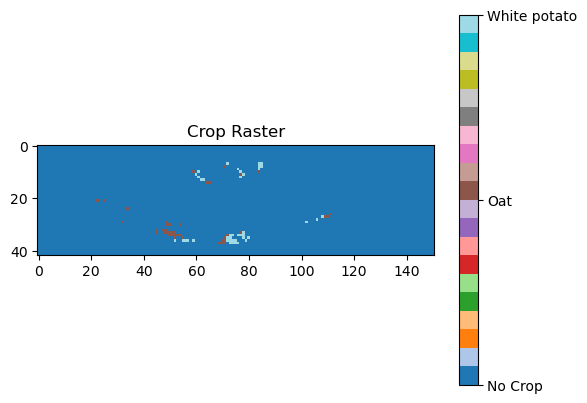

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already obtained the 'max_crops' array

# Define a colormap for different crops
cmap = plt.get_cmap('tab20')

# Create a color index array based on the unique crop names
crop_names = np.unique(iceland_crop)
crop_indices = {crop: i for i, crop in enumerate(crop_names)}

# Convert crop names to corresponding color indices
color_index = np.vectorize(crop_indices.get)(iceland_crop)

# Plot the raster
plt.imshow(color_index, cmap=cmap, interpolation='nearest')

# Add a colorbar legend for crop names
cbar = plt.colorbar(ticks=np.arange(len(crop_names)))
cbar.ax.set_yticklabels(crop_names)

# Set the title and show the plot
plt.title('Crop Raster')
plt.show()

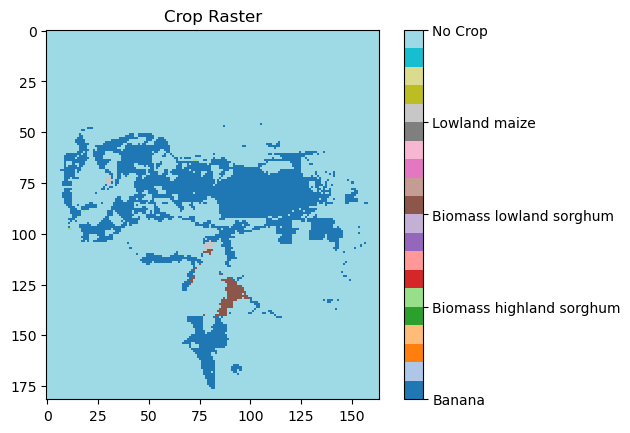

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already obtained the 'max_crops' array

# Define a colormap for different crops
cmap = plt.get_cmap('tab20')

# Create a color index array based on the unique crop names
crop_names = np.unique(venezuela_crop)
crop_indices = {crop: i for i, crop in enumerate(crop_names)}

# Convert crop names to corresponding color indices
color_index = np.vectorize(crop_indices.get)(venezuela_crop)

# Plot the raster
plt.imshow(color_index, cmap=cmap, interpolation='nearest')

# Add a colorbar legend for crop names
cbar = plt.colorbar(ticks=np.arange(len(crop_names)))
cbar.ax.set_yticklabels(crop_names)

# Set the title and show the plot
plt.title('Crop Raster')
plt.show()

In [30]:
# # Trying to create a function that gives us a raster with each crop assigned a different colour so that we can them 
# # altogether and analyse.

# import geopandas as gpd
# import rasterio
# import numpy as np

# # Load the shapefile of Iceland using geopandas
# iceland_shapefile = iceland


# # Create an empty colored raster with the same extent and resolution as the Iceland shapefile using rasterio
# colored_raster = rasterio.open(
#     'colored_raster.tif',
#     'w',
#     driver='GTiff',
#     width=iceland_shapefile.bounds['maxx'] - iceland_shapefile.bounds['minx'],
#     height=iceland_shapefile.bounds['maxy'] - iceland_shapefile.bounds['miny'],
#     count=1,  # Single band
#     dtype=rasterio.uint8,  # Unsigned 8-bit integer
#     crs=iceland_shapefile.crs,
#     transform=rasterio.transform.from_bounds(*iceland_shapefile.total_bounds,
#                                              width=iceland_shapefile.bounds['maxx'] - iceland_shapefile.bounds['minx'],
#                                              height=iceland_shapefile.bounds['maxy'] - iceland_shapefile.bounds['miny'])
# )

# # Define a color palette for your crops
# color_mapping = {
#     'No Crop': (255, 255, 255),   # White
#     'Pasture Legumes': (0, 255, 0),   # Green
#     'White Potato': (0, 0, 255),   # Blue
#     'Oat':  (255, 0, 0)  # Red
#     # Add more crops and colors as needed
# }

# # Create an empty numpy array to store the colored raster
# colored_array = np.zeros_like(iceland_crop, dtype=np.uint8)

# # Iterate over each pixel in the colored raster and assign the corresponding color
# for idx, crop_name in np.ndenumerate(iceland_crop):
#     color = color_mapping.get(crop_name, (0, 0, 0))  # Default to black if crop name not found in the mapping
#     colored_array[idx] = color

# # Write the colored array to the colored raster
# colored_raster.write(colored_array, 1)

# # Close the colored raster
# colored_raster.close()

# # Open the colored raster as a memory file
# with rasterio.MemoryFile() as memfile:
#     with memfile.open(**colored_raster.profile) as dataset:
#         dataset.write(colored_array, 1)


In [31]:
import numpy as np
import matplotlib.pyplot as plt

def graph_plotter_marginal(shapefile, climate_model, water_supply_future, input_level):
    time_periods = ['2011-2040', '2041-2070', '2071-2100']
    RCPs = ['RCP2.6', 'RCP4.5', 'RCP6.0', 'RCP8.5']
    
    fig, axs = plt.subplots(1, 3, figsize=(16, 4))  # Create subplots in a single row
    
    array_for_max_potentials =[]
    
    array_for_max_crops = []
    
    array_for_max_yield_crop = []

    for i, time_period in enumerate(time_periods):
        biomass_potentials = np.array([])  # Initialize biomass_potentials for each RCP
        
        for RCP in RCPs:
            potential_value, max_potential_array, max_crop, _ , max_yield_crop = get_biomass_potential_for_marginal(shapefile, time_period, climate_model, RCP, water_supply_future, input_level)
            biomass_potentials = np.append(biomass_potentials, potential_value)
            
            array_for_max_potentials.append(max_potential_array)
            array_for_max_crops.append(max_crop)
            array_for_max_yield_crop.append(max_yield_crop)

        axs[i].bar(RCPs, biomass_potentials, color='blue')
        axs[i].set_xlabel('RCPs')
        axs[i].set_ylabel('Biomass Potential from Marginal Land')
        axs[i].set_title(f'Biomass Potential from different RCPs in {time_period}')

    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()
    
    with rasterio.open(potential_yield.iloc[2,14].strip()) as src:
        standard_transform = src.transform 
        standard_crs= src.crs
    
    
    
    return array_for_max_potentials,array_for_max_crops,array_for_max_yield_crop

In [32]:
# Comes handy in a lot of situations
with rasterio.open(potential_yield.iloc[2,14].strip()) as src:
    standard_transform = src.transform 
    standard_crs= src.crs
    

In [33]:
# start_time = time.time()
# array_for_max_potentials, array_for_max_crops , array_for_max_yield_crop = graph_plotter_marginal(iceland ,'IPSL-CM5A-LR',
#                                         'Available water content of 200 mm/m (under irrigation conditions)','High')
# elapsed_time = time.time() - start_time
# print("Elapsed time:", elapsed_time, "seconds")

Potential crop RPR errors based on checks: Pasture Legumes.

In [34]:
import plotly
import plotly.graph_objects as go

def graph_plotter_cropland(shapefile, climate_model, water_supply_future, input_level):
    time_periods = ['2011-2040', '2041-2070', '2071-2100']
    RCPs = ['RCP2.6', 'RCP4.5', 'RCP6.0', 'RCP8.5']
    
    fig = go.Figure()  # Create a new Plotly figure
    
    initial_potential_1 = get_actual_data_biomass_potential_all(shapefile , 2000 , 'Total')
    initial_potential_2 = get_actual_data_biomass_potential_all(shapefile , 2010 , 'Total')

    for i, time_period in enumerate(time_periods):
        biomass_potentials = []  # Initialize biomass_potentials for each RCP
        biomass_potentials.append(initial_potential_1)
        biomass_potentials.append(initial_potential_2) # Add initial potentials as a sublist
        
        for RCP in RCPs:
            potential_value = future_residues_all(time_period, climate_model, RCP, water_supply_future, input_level,
                                                  shapefile, 'Total')
            biomass_potentials.append(potential_value)
            
        x_values = ['2000', '2010'] + RCPs
        fig.add_trace(go.Bar(x=x_values, y=biomass_potentials, name=f'{time_period}'))  # Add a bar trace to the figure

    fig.update_layout(
        barmode='group',
        xaxis=dict(title='Years'),
        yaxis=dict(title='Biomass Potential from Cropland Land'),
        title=dict(text='Biomass Potential from different RCPs'),
    )

    fig.show()  # Display the interactive Plotly figure


In [ ]:
# graph_plotter_cropland(punjab, 'IPSL-CM5A-LR',
#                          'Available water content of 200 mm/m (under irrigation conditions)','High')

In [ ]:
# punjab = shapefile_generator('India', 'Goa')

In [26]:
venezuela = shapefile_generator('Venezuela')

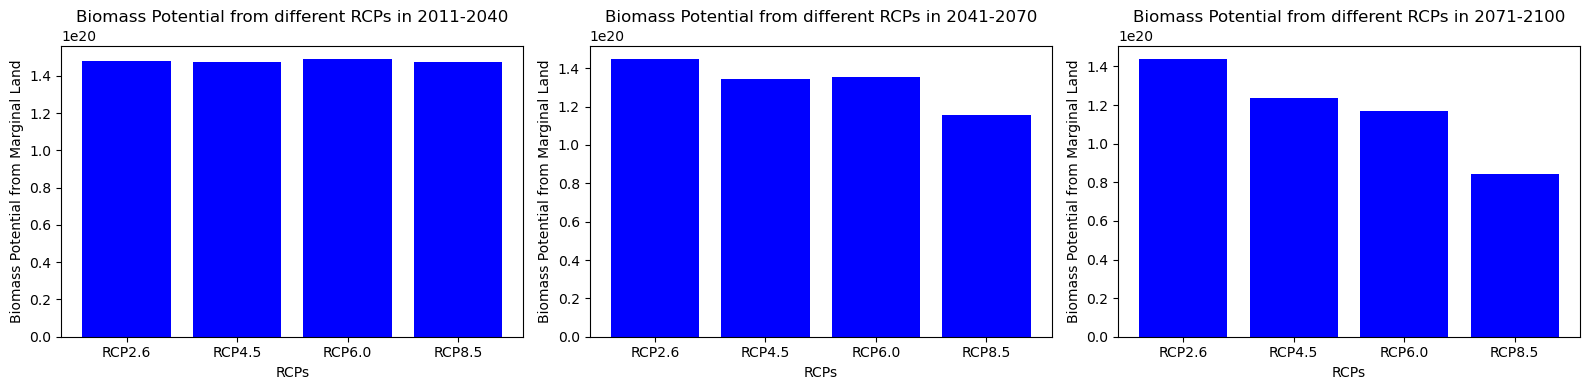

([array([[[-0., -0., -0., ..., -0., -0., -0.],
          [-0., -0., -0., ..., -0., -0., -0.],
          [-0., -0., -0., ..., -0., -0., -0.],
          ...,
          [-0., -0., -0., ..., -0., -0., -0.],
          [-0., -0., -0., ..., -0., -0., -0.],
          [-0., -0., -0., ..., -0., -0., -0.]]]),
  array([[[-0., -0., -0., ..., -0., -0., -0.],
          [-0., -0., -0., ..., -0., -0., -0.],
          [-0., -0., -0., ..., -0., -0., -0.],
          ...,
          [-0., -0., -0., ..., -0., -0., -0.],
          [-0., -0., -0., ..., -0., -0., -0.],
          [-0., -0., -0., ..., -0., -0., -0.]]]),
  array([[[-0., -0., -0., ..., -0., -0., -0.],
          [-0., -0., -0., ..., -0., -0., -0.],
          [-0., -0., -0., ..., -0., -0., -0.],
          ...,
          [-0., -0., -0., ..., -0., -0., -0.],
          [-0., -0., -0., ..., -0., -0., -0.],
          [-0., -0., -0., ..., -0., -0., -0.]]]),
  array([[[-0., -0., -0., ..., -0., -0., -0.],
          [-0., -0., -0., ..., -0., -0., -0.],
      

In [28]:
graph_plotter_marginal(venezuela, 'IPSL-CM5A-LR',
                       'Available water content of 200 mm/m (under irrigation conditions)','High')